In [1]:
import SVH
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import combinations
from collections import Counter
import igraph
%matplotlib inline

## Benchmark analysis

In [2]:
results = []
scale = 0.5

for _ in range(10):

    for pn in np.arange(0,0.51,0.1):
        bip_df,groups = SVH.create_bench(500,5,scale,pn)
        svh = SVH.get_svh(bip_df)
        svn = SVH.get_svn(bip_df)
        performance = SVH.compute_tpr(svh,svn,groups)

        results.extend([(scale,pn,order,performance['TPR_ho'][order],performance['TPR_pw'][order],
                         performance['FDR_ho'][order],performance['FDR_pw'][order]) for order in performance['TPR_ho']])

In [3]:
results_df = pd.DataFrame(results,columns=['scale','noise','order','TPR_ho','TPR_pw','FDR_ho','FDR_pw'])

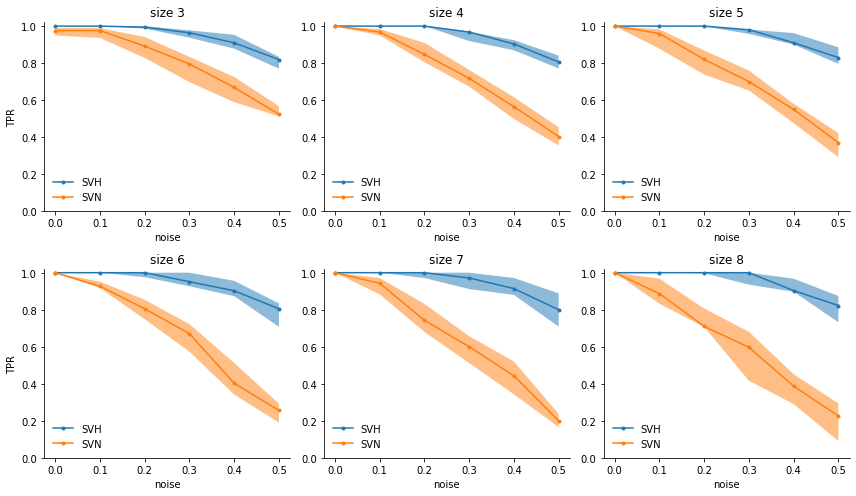

In [4]:
noises = sorted(results_df.noise.unique())

scale = 0.5
    

    
fig,axes = plt.subplots(2,3,figsize=(12,7))
axes = axes.flatten()

for ax,order in zip(axes,sorted(results_df.order.unique())):

    tpr_ho =  [(results_df.query('noise==@noise & order==@order & scale==@scale').TPR_ho).median() for noise in noises]
    tpr_ho_up =  [np.percentile((results_df.query('noise==@noise & order==@order & scale==@scale').TPR_ho),90) for noise in noises]
    tpr_ho_down =  [np.percentile((results_df.query('noise==@noise & order==@order & scale==@scale').TPR_ho),10) for noise in noises]

    tpr_pw =  [(results_df.query('noise==@noise & order==@order & scale==@scale').TPR_pw).median() for noise in noises]
    tpr_pw_up =  [np.percentile((results_df.query('noise==@noise & order==@order & scale==@scale').TPR_pw),90) for noise in noises]
    tpr_pw_down =  [np.percentile((results_df.query('noise==@noise & order==@order & scale==@scale').TPR_pw),10) for noise in noises]


    ax.fill_between(noises,tpr_ho_down,tpr_ho_up,alpha=.5)
    ax.plot(noises,tpr_ho,'.-',label='SVH') 
    ax.fill_between(noises,tpr_pw_down,tpr_pw_up,alpha=.5)
    ax.plot(noises,tpr_pw,'.-',label='SVN') 
    ax.set_xlabel('noise')
    ax.set_title('size {}'.format(order))
    ax.set_ylim([0,1.02])
    ax.legend(frameon=False)
    if order in [3,6]: ax.set_ylabel('TPR')
    sns.despine(ax=ax)

plt.tight_layout()

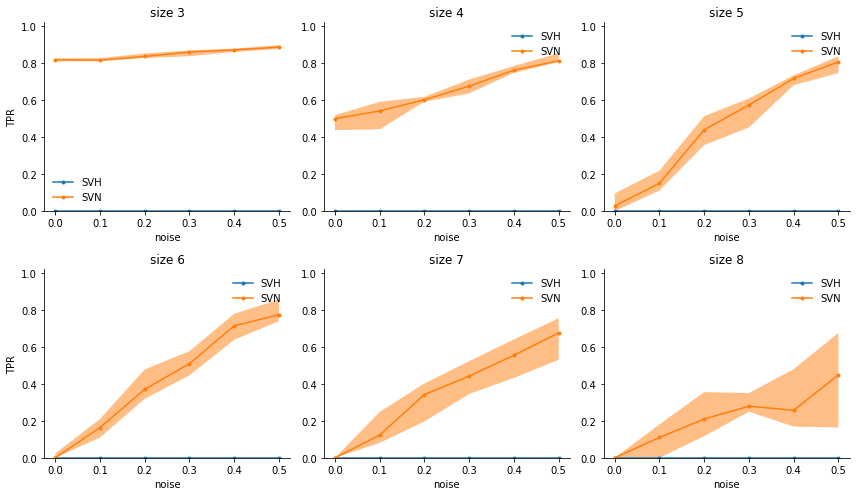

In [5]:
fig,axes = plt.subplots(2,3,figsize=(12,7))
axes = axes.flatten()

for ax,order in zip(axes,sorted(results_df.order.unique())):

    fdr_ho =  [(results_df.query('noise==@noise & order==@order & scale==@scale').FDR_ho).median() for noise in noises]
    fdr_ho_up =  [np.percentile((results_df.query('noise==@noise & order==@order & scale==@scale').FDR_ho),90) for noise in noises]
    fdr_ho_down =  [np.percentile((results_df.query('noise==@noise & order==@order & scale==@scale').FDR_ho),10) for noise in noises]

    fdr_pw =  [(results_df.query('noise==@noise & order==@order & scale==@scale').FDR_pw).median() for noise in noises]
    fdr_pw_up =  [np.percentile((results_df.query('noise==@noise & order==@order & scale==@scale').FDR_pw),90) for noise in noises]
    fdr_pw_down =  [np.percentile((results_df.query('noise==@noise & order==@order & scale==@scale').FDR_pw),10) for noise in noises]


    ax.fill_between(noises,fdr_ho_down,fdr_ho_up,alpha=.5)
    ax.plot(noises,fdr_ho,'.-',label='SVH') 
    ax.fill_between(noises,fdr_pw_down,fdr_pw_up,alpha=.5)
    ax.plot(noises,fdr_pw,'.-',label='SVN') 
    ax.set_xlabel('noise')
    ax.set_title('size {}'.format(order))
    ax.set_ylim([0,1.02])
    ax.legend(frameon=False)
    if order in [3,6]: ax.set_ylabel('TPR')
    #ax.fill_between(scales,fdr_ho_down,fdr_ho_up,alpha=.5)
    sns.despine(ax=ax)

plt.tight_layout()

## Justice data

In [9]:
data = pd.read_csv('data/SCDB_2020_01_justiceCentered_Citation.csv',encoding = "ISO-8859-1")
data = data[~data.majority.isna()]
data = data.query('majVotes!=9')
data['decisionId'] = data.caseId + '_' + data.majority.astype(int).astype(str)

data_bip = data[['justice','decisionId']]
data_bip.columns = ['a','b']
data_bip.a = data_bip.a.astype(str)
n_a = data_bip.a.nunique()
n_b = n_a + data_bip.b.nunique()
As = data_bip.a.unique()
dict_a = dict(zip(As,range(n_a)))
dict_b = dict(zip(data_bip.b.unique(),range(n_a,n_a+n_b)))

df = data_bip
df['a'] = df['a'].apply(lambda x: dict_a[x])
df['b'] = df['b'].apply(lambda x: dict_b[x])

names_data = dict(data[['justice','justiceName']].values)
names_f = {}

for i,a in enumerate(As):
    names_f[i] = names_data[int(a)]

/home/musci8/.local/lib/python3.9/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-9-1fb325e692ad>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['a'] = df['a'].apply(lambda x: dict_a[x])
<ipython-input-9-1fb325e692ad>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [10]:
svh_justice = SVH.get_svh(df)

In [11]:
svn_justice = SVH.get_svn(df)

In [12]:
svn_justice.vcount(),svn_justice.ecount()

(38, 259)

In [13]:
justice_data = pd.read_csv('data/justicesdata.csv')
ideo_view = dict(justice_data[['spaethid','ideo']].values)

In [14]:
all_tuples = data.groupby('caseId')['justice'].apply(lambda x: tuple(sorted(x)))
all_tuples = list(filter(lambda x: len(x)==9,all_tuples.unique().tolist()))

std_all = []
std_obs = []
std_svh = []

std_allu = []
std_obsu = []
std_svhu = []

std_alld = []
std_obsd = []
std_svhd = []

for order in range(2,9):
    
    tuples = []
    for t in all_tuples: tuples.extend(list(combinations(t,order)))
    tuples = list(map(lambda x: tuple(sorted(x)),tuples))
    tuples = set(tuples)
    ideo_all = []
    for t in tuples:
            x = [float(ideo_view[str(a)]) for a in t]
            ideo_all.append(np.std(x))
            
    ideo_obs = []
    for t in svh_justice[order].group:
            x = [float(ideo_view[As[(a)]]) for a in t]
            ideo_obs.append(np.std(x))            
        
        
    ideo_svh = []
    for t in svh_justice[order].query('fdr').group:
            x = [float(ideo_view[As[(a)]]) for a in t]
            ideo_svh.append(np.std(x))
        
    std_all.append(np.mean(ideo_all))
    std_obs.append(np.mean(ideo_obs))
    std_svh.append(np.mean(ideo_svh))
    
    std_alld.append(np.mean(ideo_all) - np.std(ideo_all)/np.sqrt(len(ideo_all)))
    std_obsd.append(np.mean(ideo_obs) - np.std(ideo_obs)/np.sqrt(len(ideo_obs)))
    std_svhd.append(np.mean(ideo_svh) - np.std(ideo_svh)/np.sqrt(len(ideo_svh)))
    
    std_allu.append(np.mean(ideo_all) + np.std(ideo_all)/np.sqrt(len(ideo_all)))
    std_obsu.append(np.mean(ideo_obs) + np.std(ideo_obs)/np.sqrt(len(ideo_obs)))
    std_svhu.append(np.mean(ideo_svh) + np.std(ideo_svh)/np.sqrt(len(ideo_svh)))


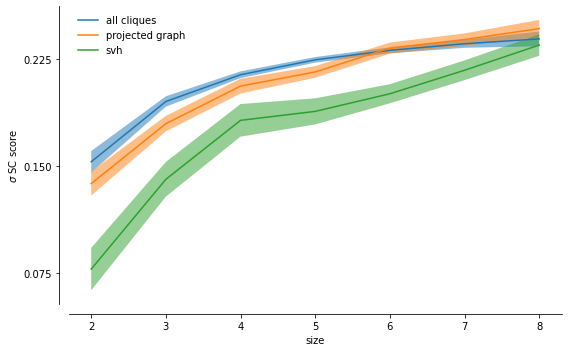

In [15]:
plt.figure(figsize=(8,5))

plt.plot(range(2,9),std_all,label='all cliques')
plt.fill_between(range(2,9),std_alld,std_allu,alpha=.5)
plt.plot(range(2,9),std_obs,label='projected graph')
plt.fill_between(range(2,9),std_obsd,std_obsu,alpha=.5)

plt.plot(range(2,9),std_svh,label='svh')
plt.fill_between(range(2,9),std_svhd,std_svhu,alpha=.5)

plt.yticks([0.075,0.15,0.225])

sns.despine(offset=10)

plt.xlabel('size')
plt.ylabel('$\sigma$ SC score')

plt.legend(frameon=False)

plt.tight_layout()

## High School data

In [16]:
data = pd.read_csv('data/High-School_data_2013.csv.gz',sep=' ',header=None)[[0,1,2]]
data.columns = ['time','a','b']
data['tuple'] = list(zip(data['a'],data['b']))

In [17]:
edges_per_time = data.groupby('time')['tuple'].apply(list).reset_index()
cliques = []

for time,edges in edges_per_time.values:
    g = igraph.Graph.TupleList(edges)
    names = g.vs['name']
    temp_c = list(map(lambda x: tuple(sorted([names[t] for t in x])),g.maximal_cliques(min=2)))
    cliques.extend(temp_c)

N_a = max(np.concatenate(cliques))
edges = []
M = N_a+1

for clique in cliques:
    for t in clique:
        edges.append((t,M))
    M+=1

df = pd.DataFrame(edges,columns=['a','b'])

In [18]:
svh_hs = SVH.get_svh(df)
svn_hs = SVH.get_svn(df)

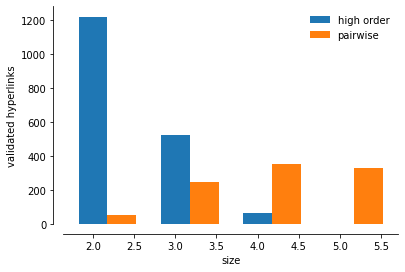

In [19]:
svn_max = {}

for order in range(2,6):
    
    svn_max[order] = list(map(lambda x: tuple(sorted(x)),svn_hs.maximal_cliques(min=order,max=order)))

size_svn = [len(svn_max.get(order,pd.DataFrame())) for order in range(2,6)]
size_svh = [svh_hs.get(order,pd.DataFrame(columns=['fdr'])).fdr.sum() for order in range(2,6)]

bar_width = 0.35

plt.bar(np.arange(2,6),size_svh,bar_width,label='high order')
plt.bar(np.arange(2,6)+bar_width,size_svn,bar_width,label='pairwise')

sns.despine(offset=10)
plt.ylabel('validated hyperlinks')
plt.xlabel('size')
plt.legend(frameon=False)

## Physics authors

In [2]:
data = pd.read_csv('data/PACS.csv.gz').dropna()

/usr/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
svn_physics = {}
#svh_physics = {}


for pacs in [0,2,5]:
    
    print('PACS: {}'.format(pacs))
    df_pacs = data.query('PACS==@pacs').groupby('ArticleID')['AuthorDAIS'].nunique().reset_index().query('AuthorDAIS<=10').ArticleID  
    data_bip = data.query('PACS==@pacs & ArticleID in @df_pacs')[['AuthorDAIS','ArticleID']]
    data_bip.columns = ['a','b']
    D = data_bip.groupby('b')['a'].apply(lambda x: len(x)==x.nunique()).reset_index().query('a')['b'].tolist()
    data_bip = data_bip.query('b in @D')
    data_bip.a = data_bip.a.astype(str)

    n_a = data_bip.a.nunique()
    n_b = n_a + data_bip.b.nunique()    

    As = data_bip.a.unique()

    dict_a = dict(zip(As,range(n_a)))
    dict_b = dict(zip(data_bip.b.unique(),range(n_a,n_a+n_b)))
    df = data_bip
    df['a'] = df['a'].apply(lambda x: dict_a[x])
    df['b'] = df['b'].apply(lambda x: dict_b[x])   
    #svh_physics[pacs] = SVH.get_svh(df)
    svn_physics[pacs] = SVH.get_svn(df)

PACS: 0
PACS: 2
PACS: 5


In [7]:
import pickle
with open('PACS_SVH.pickle', 'rb') as handle:
    svh_physics = pickle.load(handle)

In [10]:
orders = range(2,11)

bar_npapers = {}
bar_svh = {}
bar_svn = {}

for pacs in [0,2,5]:
    df_pacs = data.query('PACS==@pacs').groupby('ArticleID')['AuthorDAIS'].nunique().reset_index().query('AuthorDAIS<11 & AuthorDAIS>1')
    A1 = (df_pacs.groupby('AuthorDAIS')['ArticleID'].nunique().reset_index()['ArticleID']/len(df_pacs))
    A = list(A1.cumsum())
    bar_npapers[pacs] = (orders,(A1))  

    cliques = []
    for order in sorted(svh_physics[pacs]): cliques.extend(list(map(len,svh_physics[pacs][order].query('fdr').group)))
        
    counter_size = Counter(cliques)
    
    cdf = np.array([counter_size[size] for size in orders])
    cdf1 = cdf/cdf.sum()
    cdf = list(cdf1.cumsum())
    bar_svh[pacs] = orders,(cdf1)
    
    cliques = list(map(len,svn_physics[pacs].maximal_cliques(min=2,max=10))) 
    counter_size = Counter(cliques)
    
    cdf = np.array([counter_size[size] for size in orders])
    cdf1 = cdf/cdf.sum()
    cdf = list(cdf1.cumsum())
    bar_svn[pacs] = orders,list(cdf1)


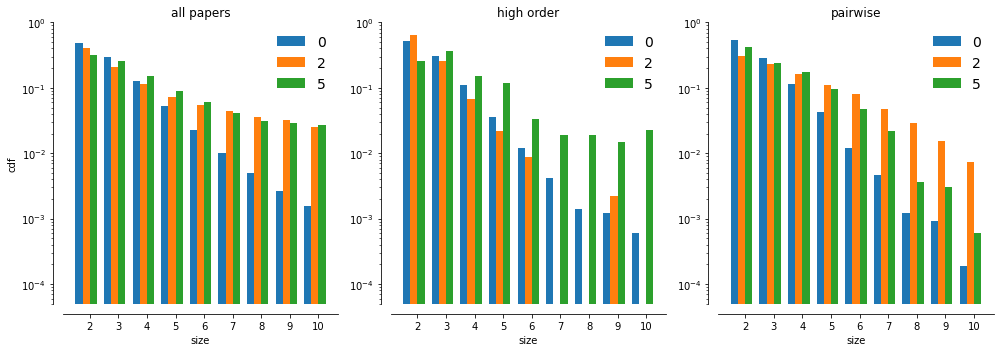

In [12]:
fig,axes = plt.subplots(1,3,figsize=(14,5))
axes = axes.flatten()
w = 0.25

for n,pacs in enumerate(bar_npapers):
    a,b = bar_npapers[pacs]
    axes[0].bar(np.array(a)-3*w/2+n*w,b,width=w,label=pacs)

axes[0].legend(frameon=False,fontsize=14)
sns.despine(offset=10,ax=axes[0])
axes[0].set_xticks(orders)
axes[0].set_xlabel('size')
axes[0].set_ylabel('cdf')
axes[0].set_title('all papers')
axes[0].set_yscale('log')
axes[0].set_ylim([0.5*1e-4,1])

for n,pacs in enumerate(bar_svh):
    a,b = bar_svh[pacs]
    axes[1].bar(np.array(a)-3*w/2+n*w,b,width=w,label=pacs)
    
axes[1].legend(frameon=False,fontsize=14)
sns.despine(offset=10)
axes[1].set_xticks(orders)
axes[1].set_xlabel('size')
axes[1].set_title('high order')
axes[1].set_yscale('log')
axes[1].set_ylim([0.5*1e-4,1])

for n,pacs in enumerate(bar_svn):
    a,b = bar_svn[pacs]
    axes[2].bar(np.array(a)-3*w/2+n*w,b,width=w,label=pacs)
    
axes[2].legend(frameon=False,fontsize=14)
axes[2].set_xticks(orders)
axes[2].set_xlabel('size')
axes[2].set_ylim([0.5*1e-4,1])
axes[2].set_title('pairwise')
axes[2].set_yscale('log')

sns.despine(offset=10)
plt.tight_layout()